In [2]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [3]:
import warnings; warnings.simplefilter('ignore')
import matplotlib
import matplotlib.pyplot as plt
import rstoolbox
import pandas as pd
import seaborn as sns
import numpy as np
import copy
import glob
import os

sns.set(font_scale=3)
matplotlib.rcParams['svg.fonttype'] = 'none'
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# Scaffold Search

For each motif of interest, we perform a [_master_](http://www.grigoryanlab.org/master/) search over the __PDBnr30__ database provided by _master_ and then we use _Rosetta_ to place the binder of the motif according to the motif alignment to the matched scaffold, clean the sidechains, and evaluate clashes.

|__INFO__|__H__|__E__|__HLH__|__ELE__|__HLE__|__HxL__|
|:------:|:---:|:---:|:-----:|:-----:|:-----:|:-----:|
|Query   |2fx7 |3041 |3ixt   |3vtt   |5tpn   |4jhw   |
|Match   |1z6n |     |3lhp   |3wei   |       |       |
|Design  |3lef |     |4l8i   |4x42   |       |       |

In [4]:
dfs ={"5tpn": None, "2fx7": None, "3ixt": None, "3vtt": None, "3o41": None, "4jhw": None}
for k in dfs:
    dfs[k] = pd.read_csv(os.path.join(k, "master_search.csv.gz"))
    if os.path.isfile(os.path.join(k, "ddg_match.csv.gz")):
        tmp = pd.read_csv(os.path.join(k, "ddg_match.csv.gz"))
        dfs[k]["count"] += 1
        dfs[k] = dfs[k].merge(tmp, how="left", on=["cluster", "count"])
total_master_list = 17539

In [5]:
def plot( df, maxim, title, ax, known=None, knames=None, kcolor=None ):
    allvalues = df.sort("rmsd").groupby(["pdb","chain"]).head(1)[["rmsd"]].values
    allvalues = np.append(allvalues, [6] * (maxim - len(allvalues)))
    sns.kdeplot(allvalues, cumulative=True, lw=4, ax=ax)
    if "ddg" in df:
        ddgvalues = df[df["ddg"] <= 0 ].sort("rmsd").groupby(["pdb","chain"]).head(1)[["rmsd"]].values
        ddgvalues = np.append(ddgvalues, [6] * (maxim - len(ddgvalues)))
        sns.kdeplot(ddgvalues, cumulative=True, shade=True, lw=4, ax=ax)
    if known is not None:
        for i, k in enumerate(known):
            ax.axvline(x=k, ymin=0, ymax=5, c=kcolor[i], linewidth=2, linestyle="dashed", zorder=10)
    if knames is not None:
        for i, k in enumerate(knames):
           ax.text(known[i] - 0.3, 0.8 - (0.06 * i), k, color=kcolor[i], horizontalalignment='center', size='x-small', weight='semibold') 
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 5)
    ax.set_xlabel("RMSD")
    ax.set_ylabel("")
    ax.annotate(title, xy=(0.5, 1), xytext=(0, 5), xycoords='axes fraction',
                textcoords='offset points', ha='center', va='baseline')

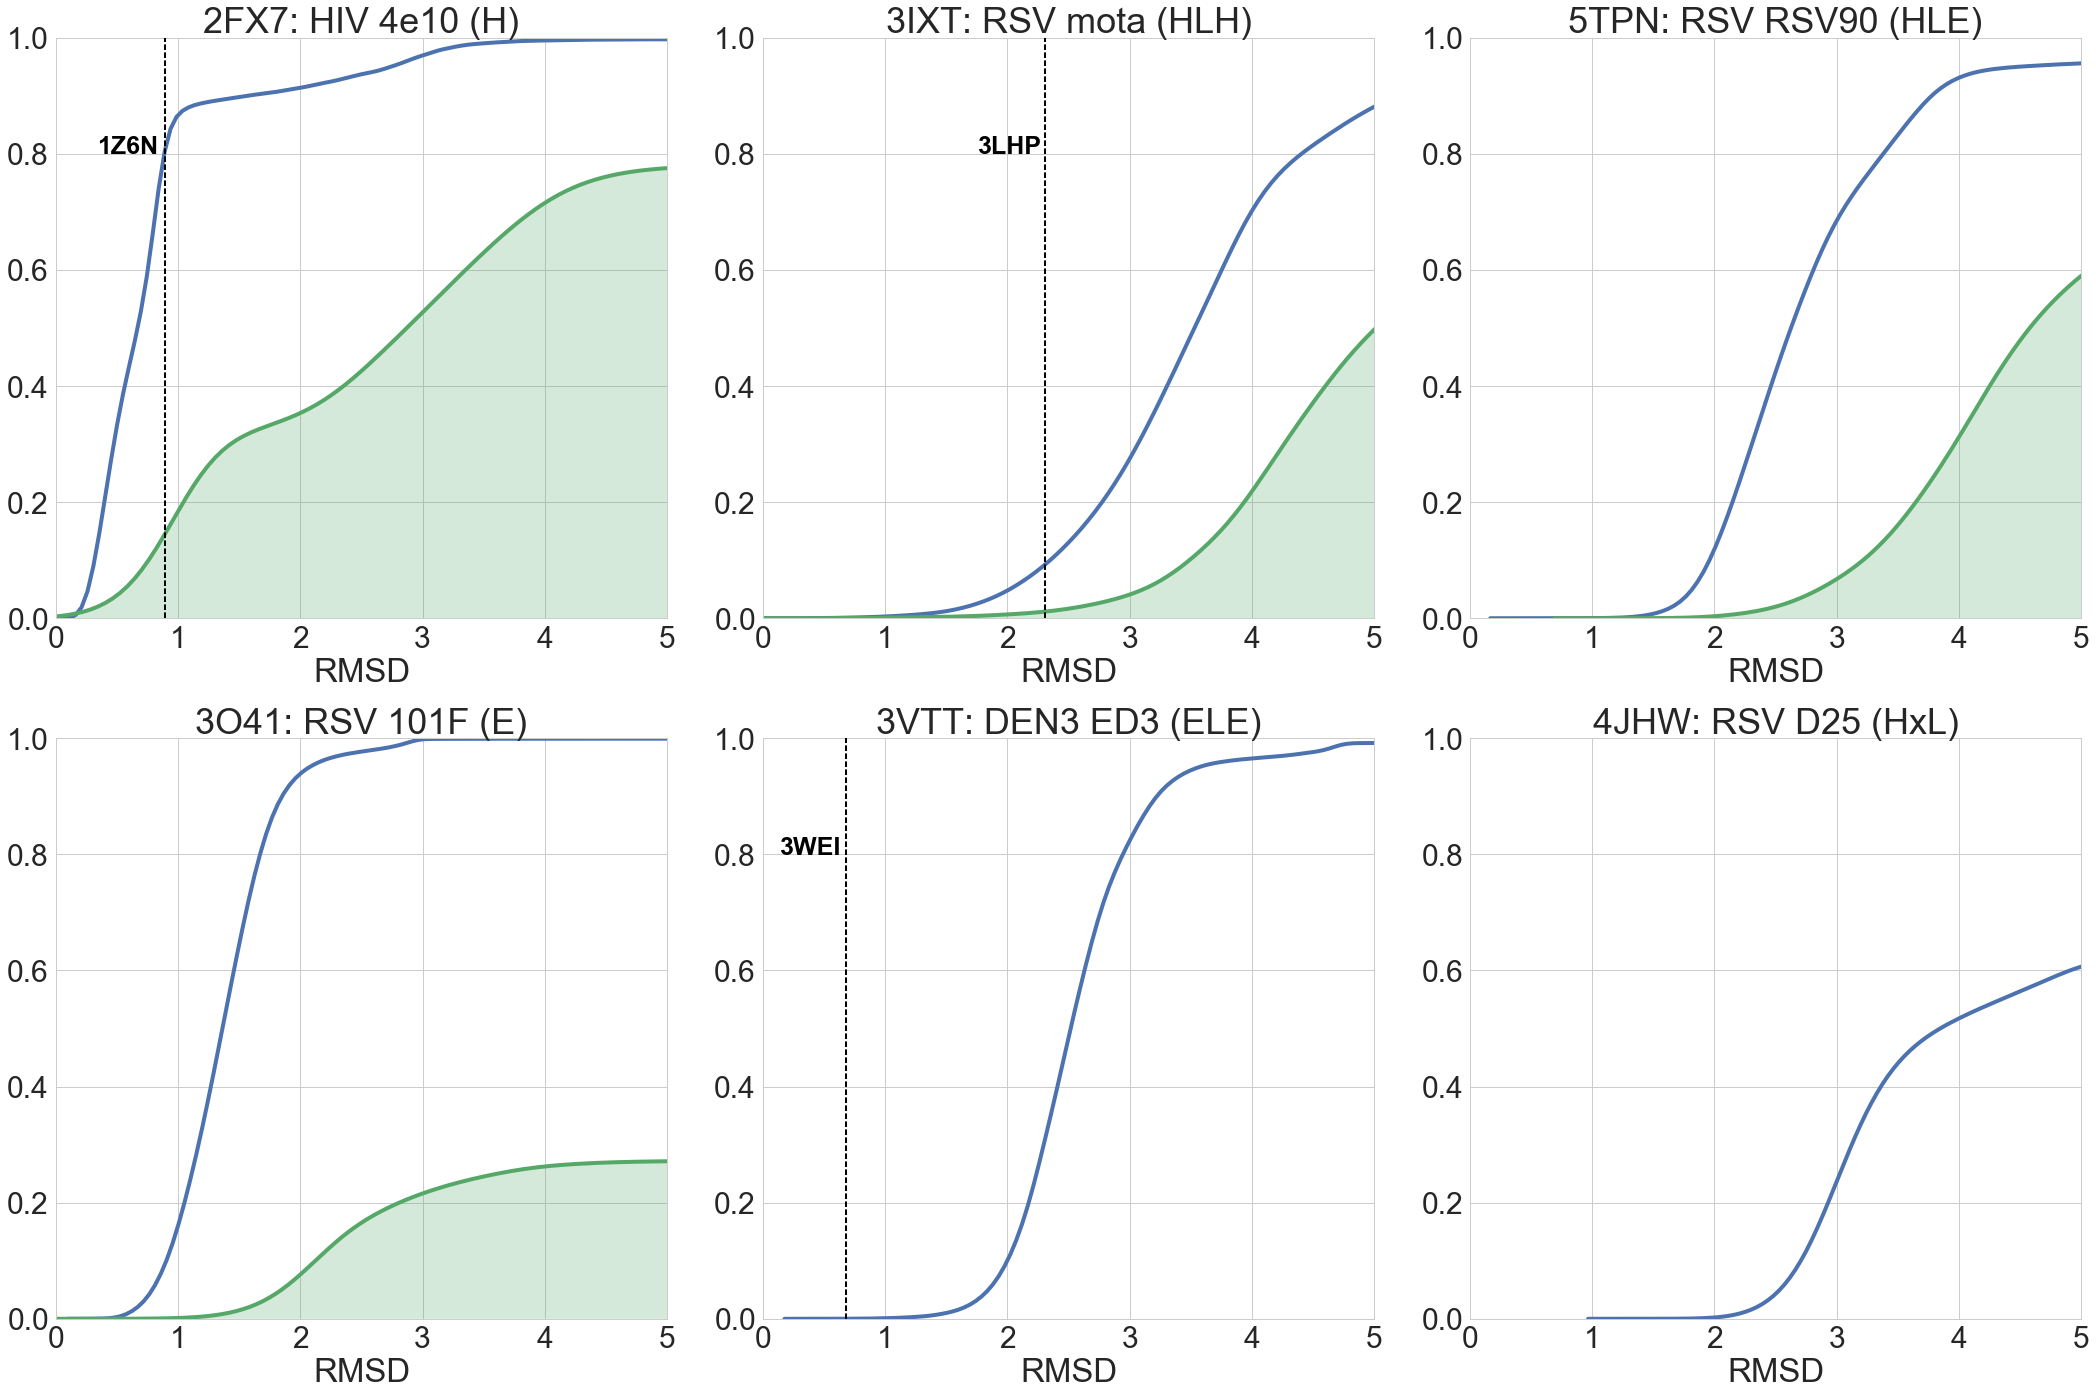

In [7]:
fig  = plt.figure(figsize=(30, 20))
grid = (2, 3)
ax11 = plt.subplot2grid(grid, (0, 0))
ax12 = plt.subplot2grid(grid, (0, 1))
ax13 = plt.subplot2grid(grid, (0, 2))
ax21 = plt.subplot2grid(grid, (1, 0))
ax22 = plt.subplot2grid(grid, (1, 1))
ax23 = plt.subplot2grid(grid, (1, 2))
plot( dfs["2fx7"], total_master_list, "2FX7: HIV 4e10 (H)",    ax11, [0.89], ["1Z6N"], kcolor=["black"] )
plot( dfs["3ixt"], total_master_list, "3IXT: RSV mota (HLH)",  ax12, [2.31], ["3LHP"], kcolor=["black"] )
plot( dfs["5tpn"], total_master_list, "5TPN: RSV RSV90 (HLE)", ax13 )
plot( dfs["3o41"], total_master_list, "3O41: RSV 101F (E)",    ax21 )
plot( dfs["3vtt"], total_master_list, "3VTT: DEN3 ED3 (ELE)",  ax22, [0.68], ["3WEI"], kcolor=["black"] )
plot( dfs["4jhw"], total_master_list, "4JHW: RSV D25 (HxL)",   ax23 )
plt.tight_layout()
plt.savefig("images/motif_recovery.svg")
plt.savefig("images/motif_recovery.png")
sns.plt.show()

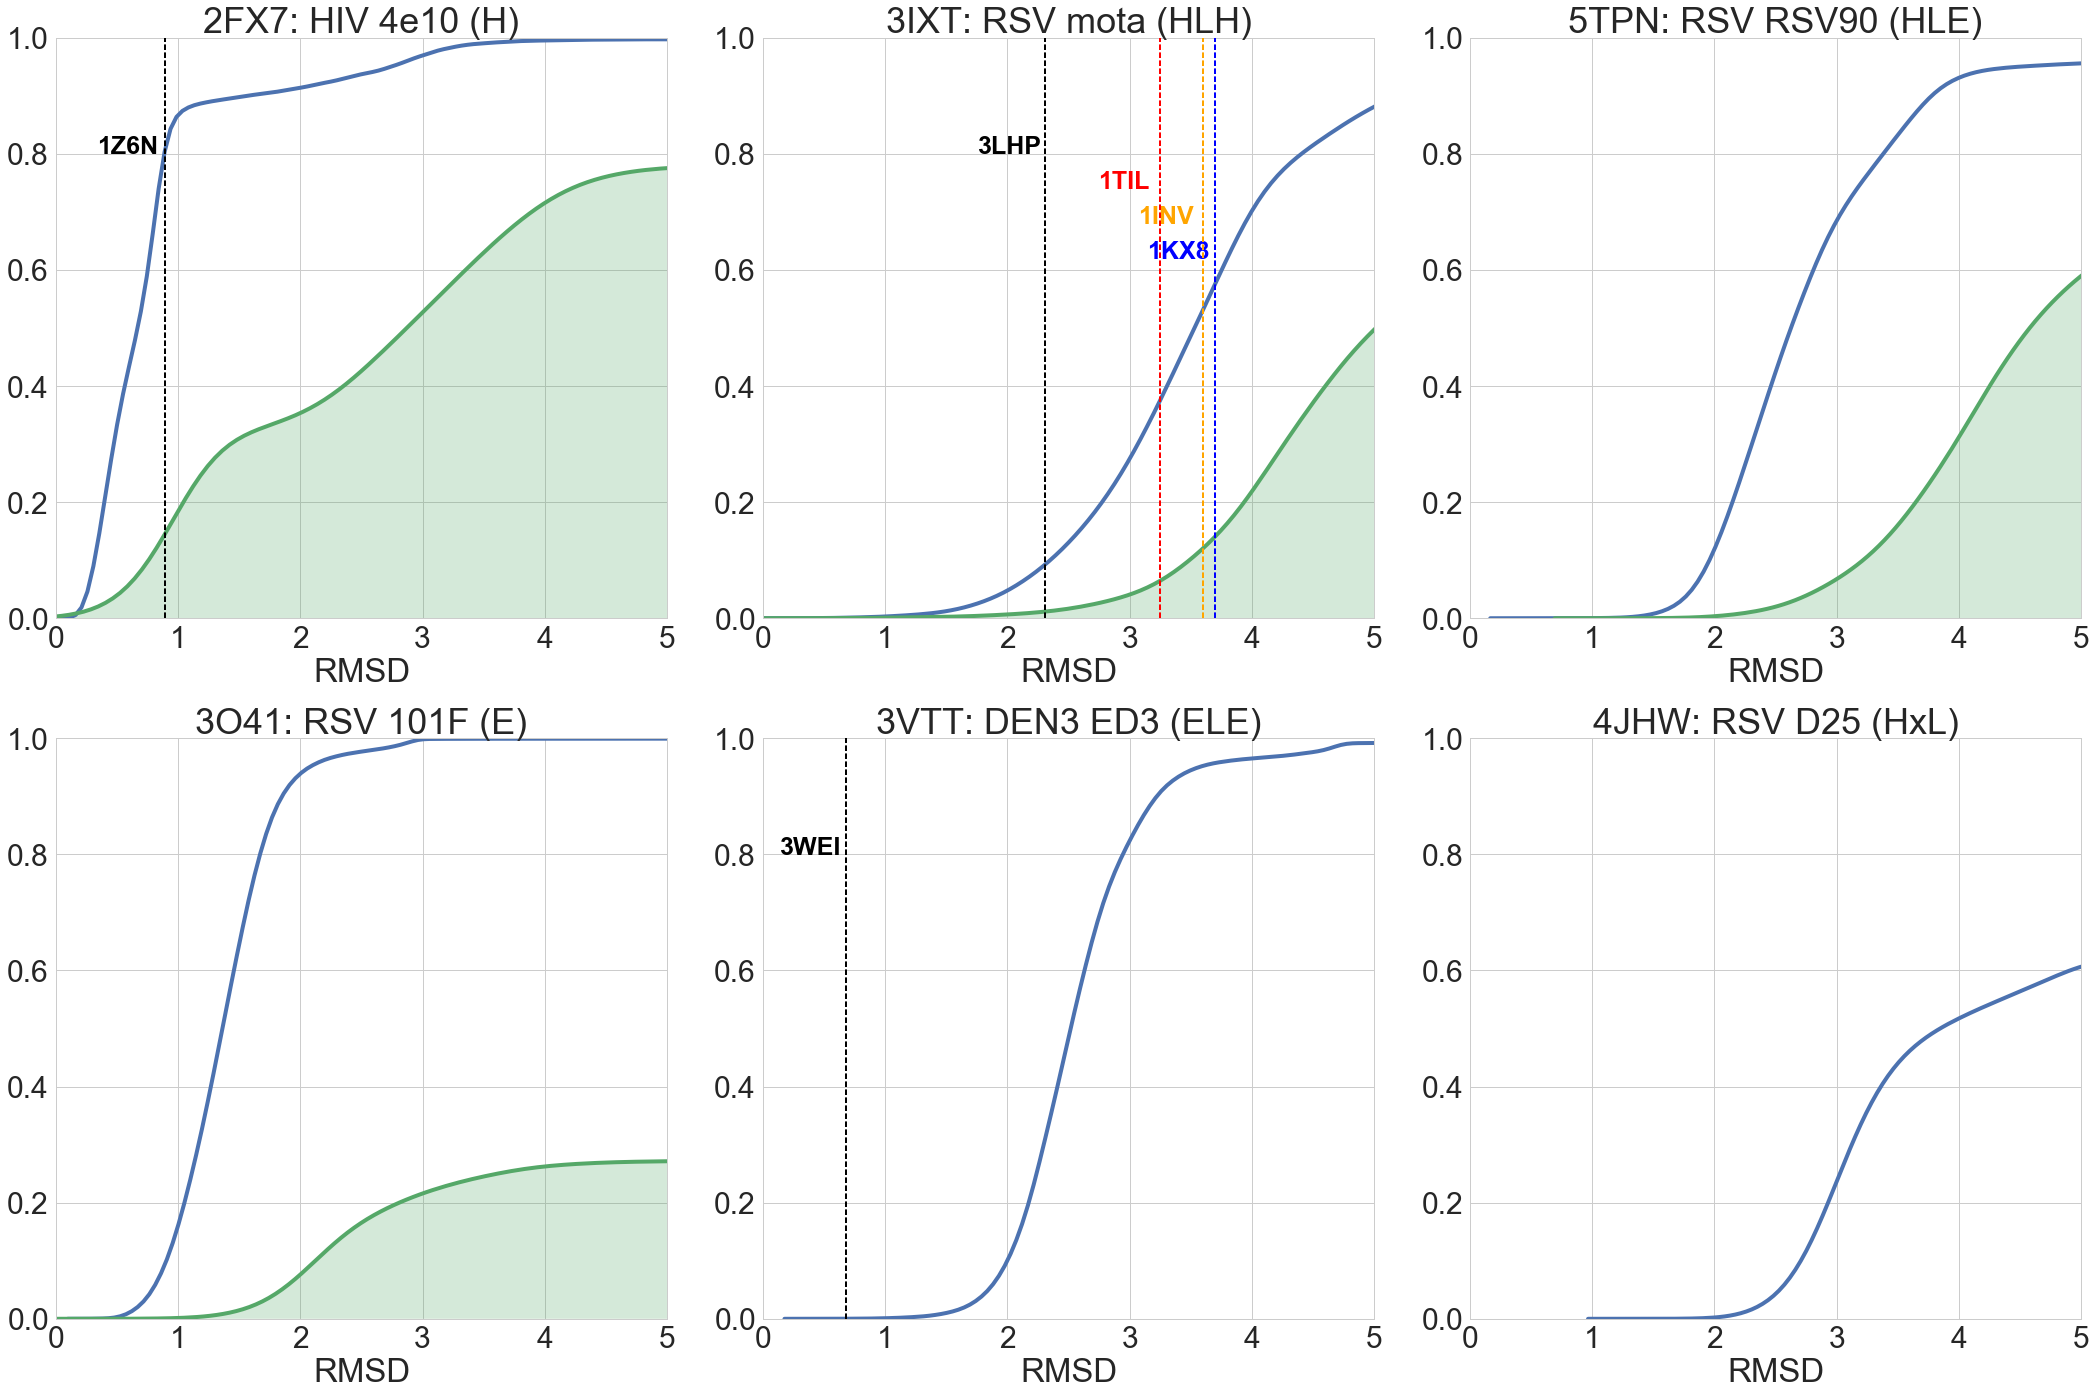

In [8]:
fig  = plt.figure(figsize=(30, 20))
grid = (2, 3)
ax11 = plt.subplot2grid(grid, (0, 0))
ax12 = plt.subplot2grid(grid, (0, 1))
ax13 = plt.subplot2grid(grid, (0, 2))
ax21 = plt.subplot2grid(grid, (1, 0))
ax22 = plt.subplot2grid(grid, (1, 1))
ax23 = plt.subplot2grid(grid, (1, 2))
plot( dfs["2fx7"], total_master_list, "2FX7: HIV 4e10 (H)",    ax11, [0.89], ["1Z6N"], kcolor=["black"] )
plot( dfs["3ixt"], total_master_list, "3IXT: RSV mota (HLH)",  ax12, [2.31, 3.25, 3.6, 3.7], ["3LHP", "1TIL", "1INV", "1KX8"], kcolor=["black", "red", "orange", "blue"] )
plot( dfs["5tpn"], total_master_list, "5TPN: RSV RSV90 (HLE)", ax13 )
plot( dfs["3o41"], total_master_list, "3O41: RSV 101F (E)",    ax21 )
plot( dfs["3vtt"], total_master_list, "3VTT: DEN3 ED3 (ELE)",  ax22, [0.68], ["3WEI"], kcolor=["black"] )
plot( dfs["4jhw"], total_master_list, "4JHW: RSV D25 (HxL)",   ax23 )
plt.tight_layout()
plt.savefig("images/motif_recovery_with_designs.svg")
plt.savefig("images/motif_recovery_with_designs.png")
sns.plt.show()